In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
data = tf.keras.utils.image_dataset_from_directory("data", image_size=(224, 224))
data = data.map(lambda x, y: (x / 255, y))

train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
val_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


Found 3591 files belonging to 2 classes.


In [6]:
basem = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in basem.layers:
   layer.trainable = False

In [7]:
model = Sequential()
model.add(basem)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-11-01 18:21:53.531065: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-01 18:21:55.130379: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-01 18:21:56.220655: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-11-01 18:21:56.370745: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2023-11-01 18:21:56.822280: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


79/79 [==============================] - 727s 9s/step - loss: 0.4985 - accuracy: 0.8651 - val_loss: 0.3821 - val_accuracy: 0.8977
Epoch 2/20
79/79 [==============================] - 678s 9s/step - loss: 0.1713 - accuracy: 0.9438 - val_loss: 0.2010 - val_accuracy: 0.9233
Epoch 3/20
79/79 [==============================] - 596s 8s/step - loss: 0.0582 - accuracy: 0.9782 - val_loss: 0.2947 - val_accuracy: 0.9062
Epoch 4/20
79/79 [==============================] - 490s 6s/step - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.1711 - val_accuracy: 0.9489
Epoch 5/20
79/79 [==============================] - 505s 6s/step - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.1429 - val_accuracy: 0.9489
Epoch 6/20
79/79 [==============================] - 490s 6s/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.1755 - val_accuracy: 0.9347
Epoch 7/20
79/79 [==============================] - 490s 6s/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.1818 - val_accuracy: 0.9460
Epoch 8/20
79/79 [======

In [11]:
model.save('models/tl.keras')

In [12]:
test_hist = model.evaluate(test)

22/22 [==============================] - 161s 7s/step - loss: 0.2613 - accuracy: 0.9375


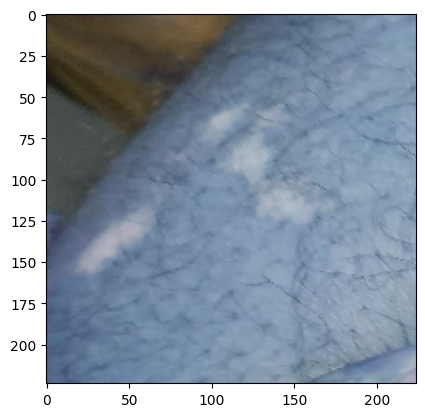

In [22]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('vit1.jpeg')

resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [23]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 492ms/step


array([[0.22174644]], dtype=float32)